<a href="https://colab.research.google.com/github/akashakash19/Online-retail-project-using-with-ML/blob/main/Online_retail_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#**Data collection and preprocessing**

In [6]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Revenue      397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


**Data Cleaning**

In [10]:
df = df.dropna(subset=['CustomerID'])

df = df[df['Quantity'] > 0]

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
total_revenue = df['Revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 8911407.904


In [12]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64


In [13]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print(top_countries)

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

**RFM Analysis**

In [14]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [16]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [17]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,7,4310.00,5,5,5,555
12348.0,75,4,1797.24,2,4,4,244
12349.0,19,1,1757.55,4,1,4,414
12350.0,310,1,334.40,1,1,2,112


In [18]:
rfm_kmeans = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_kmeans)

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Cluster
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,0
12347.0,2,7,4310.00,5,5,5,555,3
12348.0,75,4,1797.24,2,4,4,244,3
12349.0,19,1,1757.55,4,1,4,414,3
12350.0,310,1,334.40,1,1,2,112,1


In [21]:
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
print(cluster_summary)

            Recency  Frequency       Monetary
Cluster                                      
0         15.672986  22.047393   12453.225924
1        248.564030   1.551789     478.107581
2          7.384615  82.692308  127338.313846
3         43.910580   3.655748    1349.698298


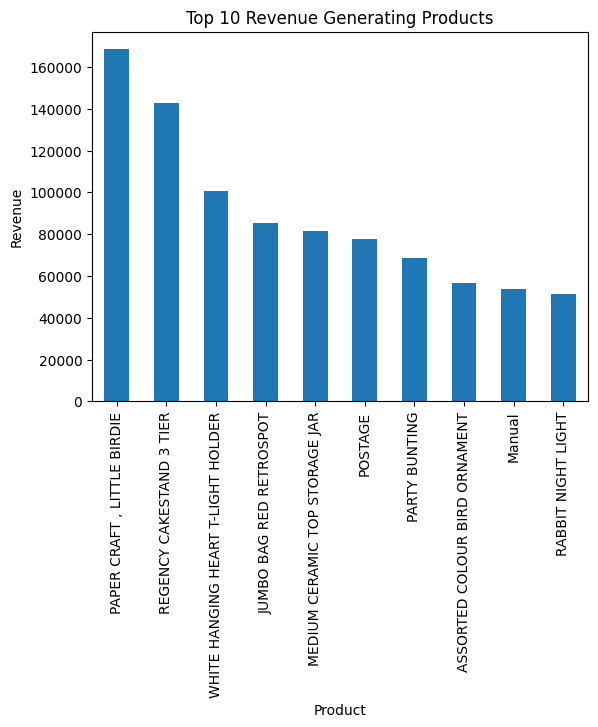

In [22]:
import matplotlib.pyplot as plt

top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Revenue Generating Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

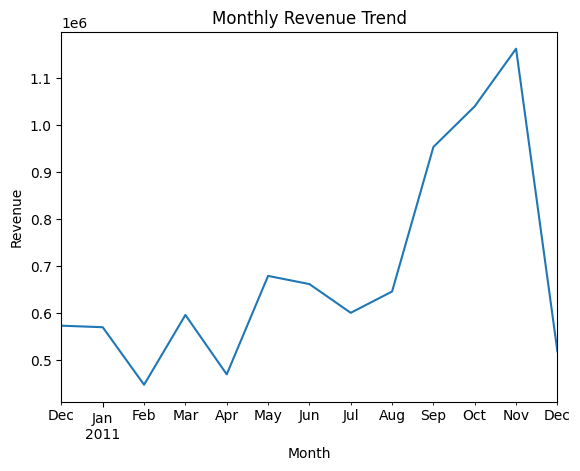

In [23]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

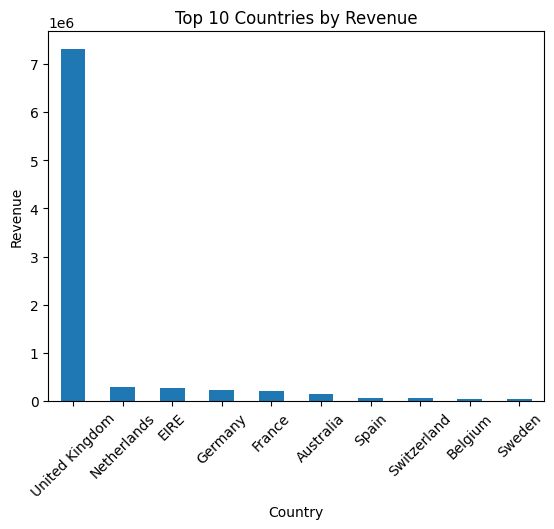

In [24]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

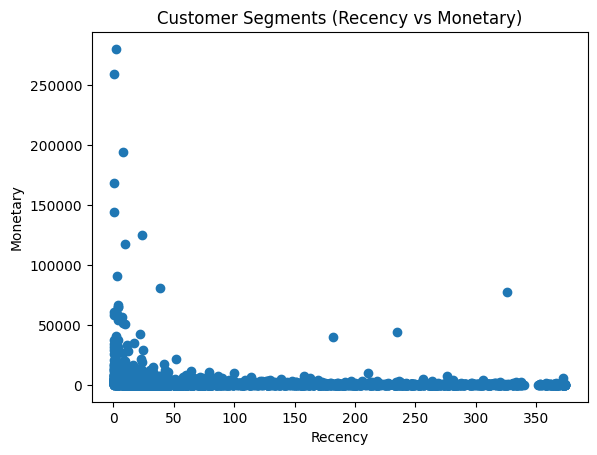

In [25]:
plt.figure()
plt.scatter(rfm['Recency'], rfm['Monetary'])
plt.title("Customer Segments (Recency vs Monetary)")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

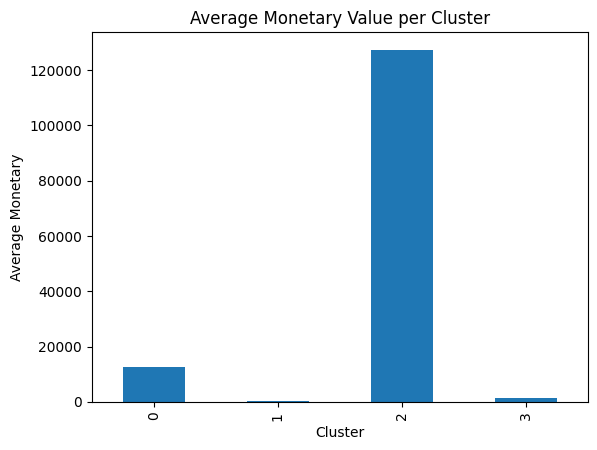

In [26]:
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

plt.figure()
cluster_summary['Monetary'].plot(kind='bar')
plt.title("Average Monetary Value per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Monetary")
plt.show()